In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
#IMPORT DATASET
housepricedata = sklearn.datasets.load_boston()

In [ ]:
print(housepricedata)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
housepricedataframe = pd.DataFrame(housepricedata.data, columns=housepricedata.feature_names)

In [ ]:
housepricedataframe

In [ ]:
housepricedataframe['price']=housepricedata.target

In [ ]:
housepricedataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
housepricedataframe.shape

(506, 14)

In [ ]:
housepricedataframe.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
housepricedataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
correl = housepricedataframe.corr()

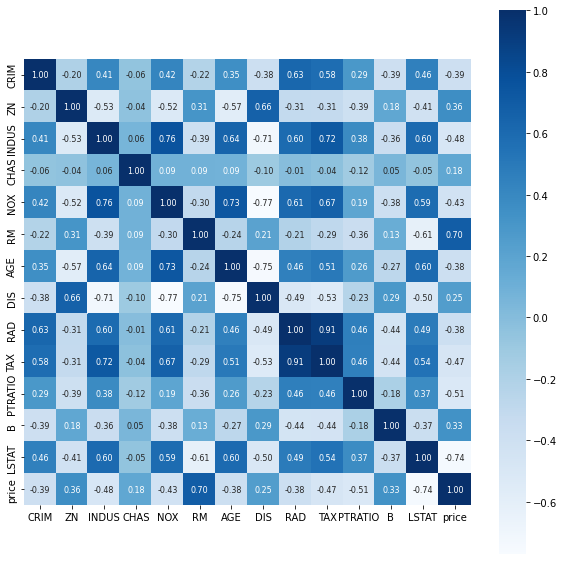

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(correl, cbar=True,square =True, fmt ='.2f',annot =True ,annot_kws = {'size':8},cmap = 'Blues')

In [ ]:
X = housepricedataframe.drop(['price'],axis =1)
Y = housepricedataframe['price']

In [ ]:
#SPLITTING DATA INTO TEST TRAIN

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (455, 13) (51, 13)


In [ ]:
 #MODEL TRAINING

In [ ]:
#XGBOOST REGRESSOR

model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

[09:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
train_data_predict =model.predict(X_train)

In [ ]:
print(train_data_predict)

[30.266716   6.2279134 36.276707  28.208923  18.805977  19.145205
 18.702806  16.028915  21.577963  19.518972  20.651178  19.152222
 29.045845  34.130077  24.851189  48.042435  27.019264  11.848356
 22.724836  12.998035   8.394689  19.110033  18.101297  25.94536
 22.884901  21.59996   22.412298  19.76658   23.217678  34.797215
 18.40712   21.057735  28.84655   41.70763   35.140278  20.422306
 23.756687  26.575853  20.009296  20.663769  19.114794  10.767911
 42.891193  46.777607   8.425619  44.49029   33.138096  20.121172
 15.655564  28.523886  23.495714  23.495714  22.147425  20.454536
 34.26085   15.506641  13.513241  22.369747  15.48957   12.217865
 21.315731  16.098185   7.7978606 30.6024    48.591717  33.19838
 20.735401  21.783344  20.45004   31.305487  20.013533  25.758942
  8.113654  45.251987  22.156515  20.561935  19.968071  20.20083
 25.952248  23.217274  32.791767  21.478662   9.198923  19.0772
 21.87092   11.949281  10.208921  13.172243  23.67052   17.793783
 15.901079  23.

In [ ]:
#R Square
score_1 = metrics.r2_score(Y_train,train_data_predict)

#Mean Aboslute Error
score_2 = metrics.mean_absolute_error(Y_train,train_data_predict)

print(score_1)
print(score_2)

0.9742288524404689
1.1363833708291524


In [ ]:
test_data_predict =model.predict(X_test)

In [ ]:
#R Square
score_1 = metrics.r2_score(Y_test,test_data_predict)

#Mean Aboslute Error
score_2 = metrics.mean_absolute_error(Y_test,test_data_predict)

print(score_1)
print(score_2)

0.8931118910994752
2.216113225151511


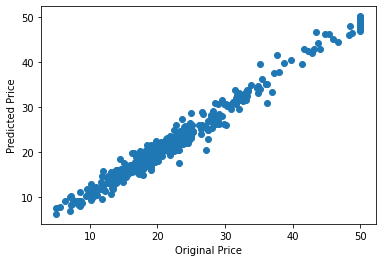

In [ ]:
plt.scatter(Y_train,train_data_predict)
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()